# Lab 8: Ordinary differential equations (1)

**Please enter your name and student number in the markdown cell below** then press `Shift` + `Enter`.

* Name:    **YOUR NAME HERE**
* SID:     **YOUR STUDENT NUMBER**

## Ordinary differential equations (1)

In this laboratory we'll begin to investigate ordinary differential equations – *ordinary* as opposed to *partial*, since we will consider only functions of a single variable. We'll begin by investigating first-order ODEs involving scalar functions, then continue to see how higher-order ODEs, coupled ODEs, and vector functions can all be investigated using very similar Python code. Specifically, we will be looking at *initial value problems* where the conditions at $t = 0$ are specified (the alternative, *boundary value problems*, might make an interesting final project).

We'll begin by coding two methods to solve ODEs: the very simple Euler method and the only slightly less simple second-order Runge-Kutta method.

In [37]:
# Start by importing our usual helper modules.

from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

To explore how these solution algorithms work, we'll solve an equation to which we already know the answer. Specifically, we will consider 
$\dot x(t) = -kx(t)$, 
to which the exact solution is of course 
$x(t) = A\exp(-kt)$ (and therefore $\dot x(t) = -kA\exp(-kt)$).

**Write a function `derivative(t, x)` that returns the expected derivative, encoding this equation in Python.** Note that in this case the derivative *doesn't* depend on $t$, and moreover that it *does* depend on the parameter $k$. Nonetheless set up the function in this way for ease of using the Python built-in tools later on.

In [80]:
def derivative(t, x):
    return -k * x
def exact_der(k,t):
    return -k * exp(-k*t)
def function(t,x):
    return exp(-k*t)

## The Euler method

Using the Euler method to solve $\mathrm dx/\mathrm dt = f(t, x)$, each step follows the following mathematical rules:

$$
\begin{align}
t_1 &= t_0 + \Delta t\\
x_1 &= x_0 + v_0\Delta t\\
v_1 &= f(t_1, x_1)
\end{align}
$$

To use the Euler method to solve this equation, we therefore do the following: 

We begin by specifying the constant `k`, the timestep `dt`, the total time `t_total`, and the initial conditions `t = 0` and `x = 1`. For convenience, we also start lists that will hold *all* of the `t`, `x`, and `v` values we run through. 

Then, translating the mathematics above into Python, we proceed as follows:

    Loop (t_total / dt) times:
        Increase t by dt
        Increase x by v*dt
        Update v using the derivative function with the new t and x
        
        Append t to t_list, x to x_list, and v to v_list
        
**Complete the following code using the algorithm above.**

In [83]:
k = 1.5
dt = 0.35
t_total = 5

t = 0
x = 1
v = derivative(t, x)

t_list = [t]
x_list = [x]
v_list = [v]
exact_list = [exact_der(k,t)]
exact_x_list = [function(t,x)]

for i in range(0,int(t_total/dt)):
    t = t + dt
    x = x + v*dt
    v = derivative(t,x)
    exact = exact_der(k,t)
    exact_x = function(t,x)
    
    t_list.append(t)
    x_list.append(x)
    v_list.append(v)
    exact_list.append(exact)
    exact_x_list.append(exact_x)

**Complete the following code to plot the $x$ and $v$ values you obtain as a function of time, along with the exact solution.**

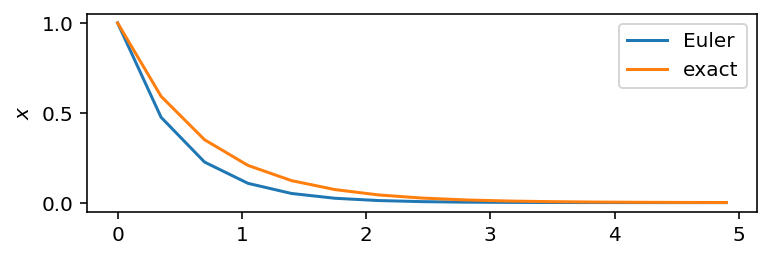

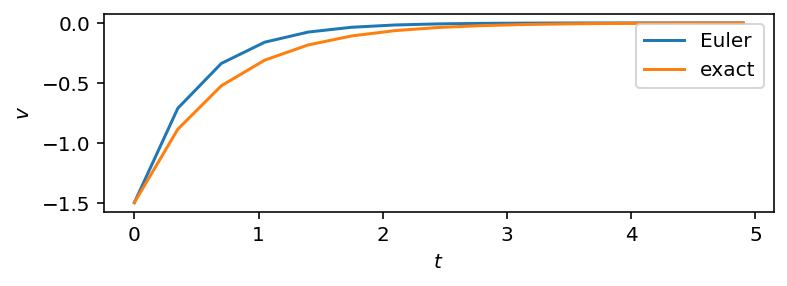

In [84]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t_list, x_list, label="Euler")
plt.plot(t_list, exact_x_list, label="exact")
plt.ylabel("$x$")
plt.legend()
plt.show()
plt.subplot(2, 1, 2)
plt.plot(t_list, v_list, label="Euler")
plt.plot(t_list, exact_list, label="exact")
plt.ylabel("$v$")
plt.xlabel("$t$")
plt.legend()

▶ **CHECKPOINT 1**

## The RK2 method

To use the second-order Runge-Kutta method, on the other hand, the algorithm is as follows:

$$
\begin{align}
t_\text{int} &= t_0 + \tfrac12\Delta t\\
x_\text{int} &= x_0 + \tfrac12v_0\Delta t\\
v_\text{int} &= f(t_\text{int}, x_\text{int})\\
\\
t_1 &= t_0 + \Delta t\\
x_1 &= x_0 + v_\text{int}\Delta t\\
v_1 &= f(t_1, x_1)
\end{align}
$$
        
**Complete the following code using this new algorithm.**

In [85]:
k = 1.5
dt = 0.35
t_total = 5

t = 0
x = 1
v = derivative(t, x)

t_list2 = [t]
x_list2 = [x]
v_list2 = [v]


for i in range(0,int(t_total/dt)):
    tint = t + 0.5*dt
    xint = x + 0.5*v*dt
    vint = derivative(tint, xint)
    
    t = t + dt
    x = x + vint*dt
    v = derivative(t,x)
    
    t_list2.append(t)
    x_list2.append(x)
    v_list2.append(v)

**Complete the following code to add your new results to the previous plot. Which of your results is closer to the exact value?**

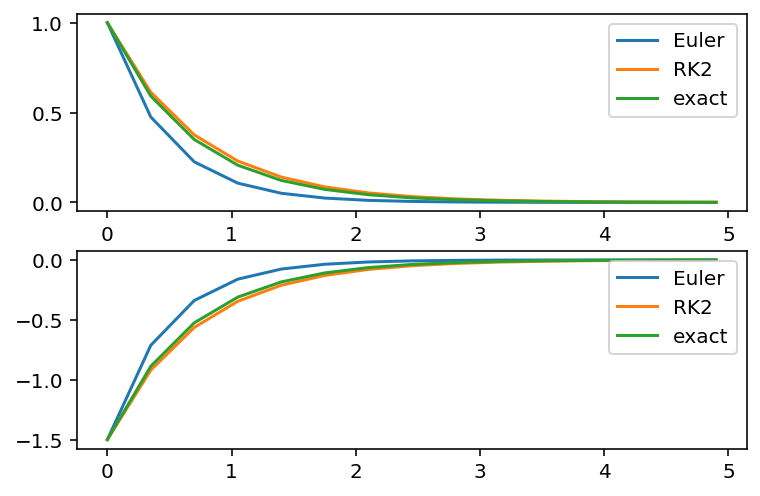

In [89]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t_list, x_list, label="Euler")
plt.plot(t_list2, x_list2, label="RK2")
plt.plot(t_list, exact_x_list, label="exact")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t_list, v_list, label="Euler")
plt.plot(t_list2, v_list2, label="RK2")
plt.plot(t_list, exact_list, label="exact")
plt.legend()

An even more accurate method, commonly used in practice, is the fourth-order Runge-Kutta method. Rather than code this ourselves, we'll use the built-in method `solve_ivp`:

In [154]:
from scipy.integrate import solve_ivp
?solve_ivp

Signature:
solve_ivp(
    fun,
    t_span,
    y0,
    method='RK45',
    t_eval=None,
    dense_output=False,
    events=None,
    vectorized=False,
    args=None,
    **options,
)
Docstring:
Solve an initial value problem for a system of ODEs.

This function numerically integrates a system of ordinary differential
equations given an initial value::

    dy / dt = f(t, y)
    y(t0) = y0

Here t is a 1-D independent variable (time), y(t) is an
N-D vector-valued function (state), and an N-D
vector-valued function f(t, y) determines the differential equations.
The goal is to find y(t) approximately satisfying the differential
equations, given an initial value y(t0)=y0.

Some of the solvers support integration in the complex domain, but note
that for stiff ODE solvers, the right-hand side must be
complex-differentiable (satisfy Cauchy-Riemann equations [11]_).
To solve a problem in the complex domain, pass y0 with a complex data type.
Another option always available is to rewrite your pro

**Use this method – remembering to use the online help (`?solve_ivp`) as needed – to solve the same equation. Once again, plot your results with the exact solution.**

*Hint:* if you write `RK4_solution = solve_ivp(...)` then you can access the $x$ results as `RK4_solution.y` and the $t$ results as `RK4_solution.t`.

*Hint 2:* by default the solution is provided only at a limited number of $t$ values. This is fine, but if you want more, or specific $t$ values, use the `t_eval` optional argument.

In [40]:
def derivative(t, x):
    return -k * x

t_total = 5
t = 0
dt = 0.35

k = 1.5
x = 1
v = derivative(t, x)

t_l = [t]
x_l = [x]

for i in range(0,int(t_total/dt)):
    t = t + dt
    x = x + v*dt
    v = derivative(t,x)

    x_l.append(x)
    t_l.append(t)

    
sol = solve_ivp(derivative, [0,5],x_l,t_eval=t_l)
print(sol.t)
print(sol.y[0])

[0.   0.35 0.7  1.05 1.4  1.75 2.1  2.45 2.8  3.15 3.5  3.85 4.2  4.55
 4.9 ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


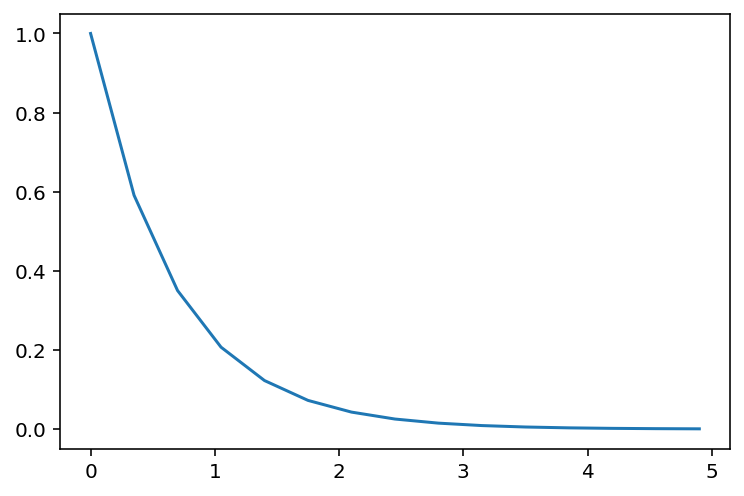

In [87]:
plt.plot(sol.t,sol.y[0])

▶ **CHECKPOINT 2**

## The harmonic oscillator and energy conservation

There is a more important difference between the Euler and RK2 methods, for physics problems, than is initially obvious. To see this, and to extend our method to a second-order equation, we consider a harmonic oscillator:

$$
\begin{align}
V(x) &= \tfrac12 k x^2 \\
F = m\frac{\mathrm d^2x}{\mathrm dt^2} &= -kx
\end{align}
$$

To represent this in Python, we let `x` be an *array* containing two elements, where the first represents $x$ and the second $\mathrm dx/\mathrm dt$. **Complete the following code to represent this in Python:**

In [37]:
import numpy as np
k = 1.
m = 1.

def derivative_harmonic(t, x):
    x0, x1 = x
    dx0 = x1
    dx1 = (-k*x0)/m
    return np.array((dx0, dx1))

**Complete the following code to solve this equation using the Euler method.** This is almost the same as above; we just need to use the `copy` function to copy `array`s (otherwise we will end up with multiple names for the *same* space in memory, which will give peculiar results!).

In [38]:
t_total = 10
dt = 0.1
t = 0
x = np.array((1, 0))
v = derivative_harmonic(t, x)

t_list = [t]
x_list = [x.copy()]
v_list = [v.copy()]

for i in range(0,int(t_total/dt)):
    t = t + dt
    x = x + v*dt
    v = derivative_harmonic(t,x)

    t_list.append(t)
    x_list.append(x.copy())
    v_list.append(v.copy())

t_list = np.array(t_list)
x_list = np.array(x_list)
v_list = np.array(v_list)

Now **complete the following code to plot the position $x$, velocity $v$, kinetic energy $K$, potential energy $V$, and total energy $E$ as a function of time. What do you notice?**

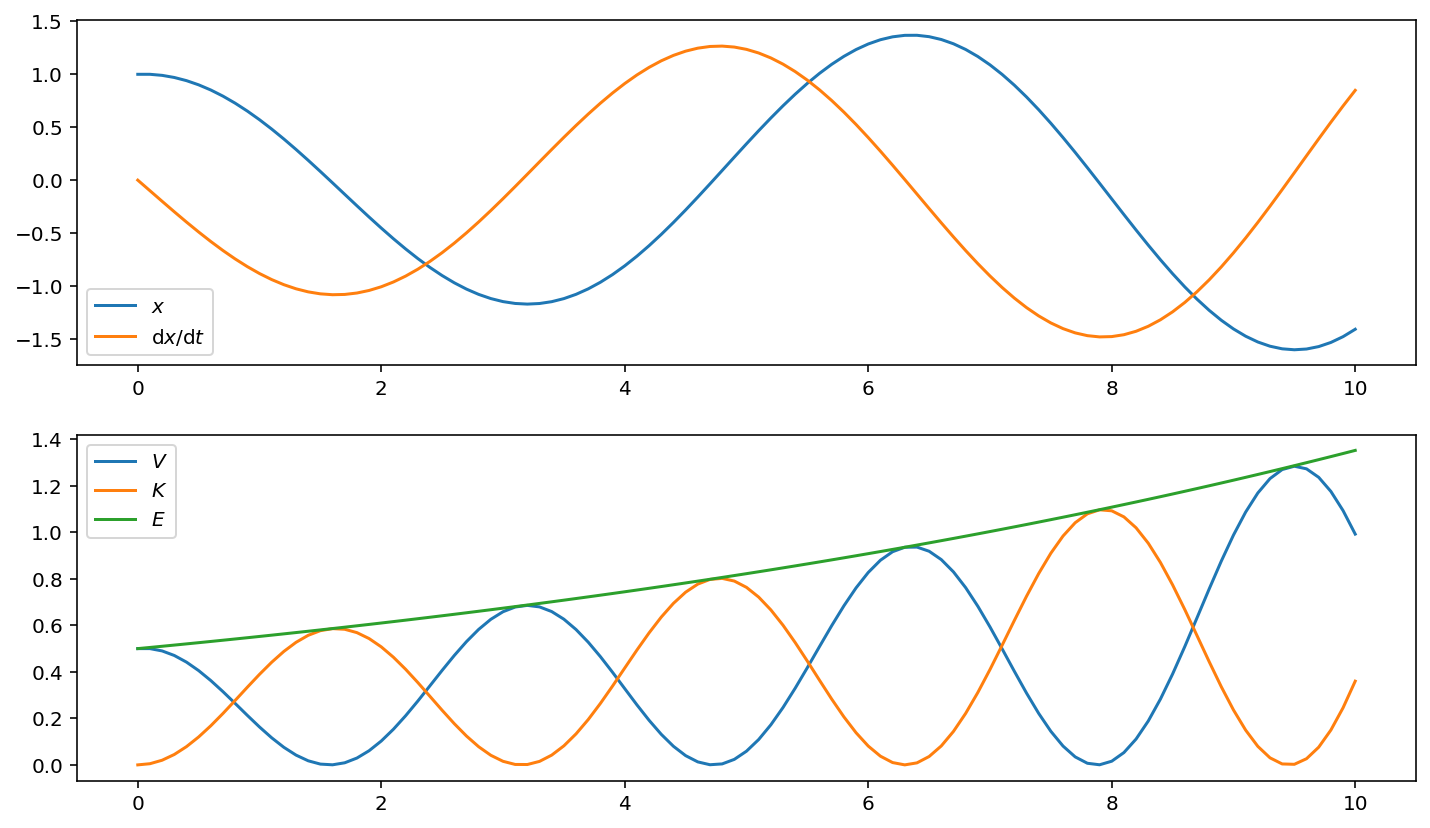

In [39]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t_list, x_list[:,0], label="$x$")
plt.plot(t_list, v_list[:,0], label='$\\mathrm{d}x/\\mathrm{d}t$')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t_list,0.5*k*(x_list[:,0]**2) , label="$V$")
plt.plot(t_list,0.5*m*(v_list[:,0]**2), label="$K$")
plt.plot(t_list,0.5*k*(x_list[:,0]**2) + 0.5*m*(v_list[:,0])**2, label="$E$")
plt.legend()

**Copy and modify the code above to perform the same calculation for the RK2 method. Compare the behaviour of the two methods.**

▶ **CHECKPOINT 3**

In [24]:
t_total = 10
dt = 0.1
t = 0
x = np.array((1., 0))
v = derivative_harmonic(t, x)

t_list = [t]
x_list = [x.copy()]
v_list = [v.copy()]

for i in range(0,int(t_total/dt)):
    tint = t + 0.5*dt
    xint = x + 0.5*v*dt
    vint = derivative_harmonic(tint, xint)
    
    t = t + dt
    x = x + vint*dt
    v = derivative_harmonic(t,x)
    
    t_list.append(t)
    x_list.append(x.copy())
    v_list.append(v.copy())

t_list = np.array(t_list)
x_list = np.array(x_list)
v_list = np.array(v_list)

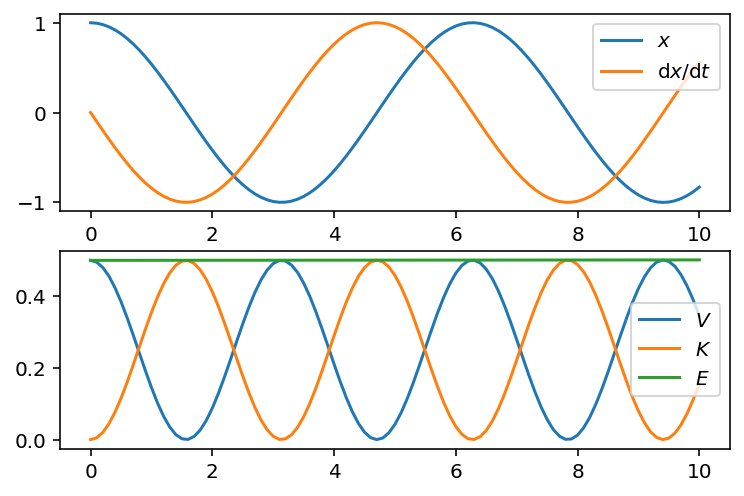

In [156]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t_list, x_list[:,0], label="$x$")
plt.plot(t_list, v_list[:,0], label='$\\mathrm{d}x/\\mathrm{d}t$')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t_list,0.5*k*(x_list[:,0])**2,label="$V$")
plt.plot(t_list,0.5*m*(v_list[:,0])**2,label="$K$")
plt.plot(t_list,0.5*k*(x_list[:,0])**2 + 0.5*m*(v_list[:,0])**2, label="$E$")
plt.legend()

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]
[1.00000000e+00 8.60706710e-01 7.40548018e-01 ... 6.16885027e-14
 5.32139859e-14 4.58621543e-14]


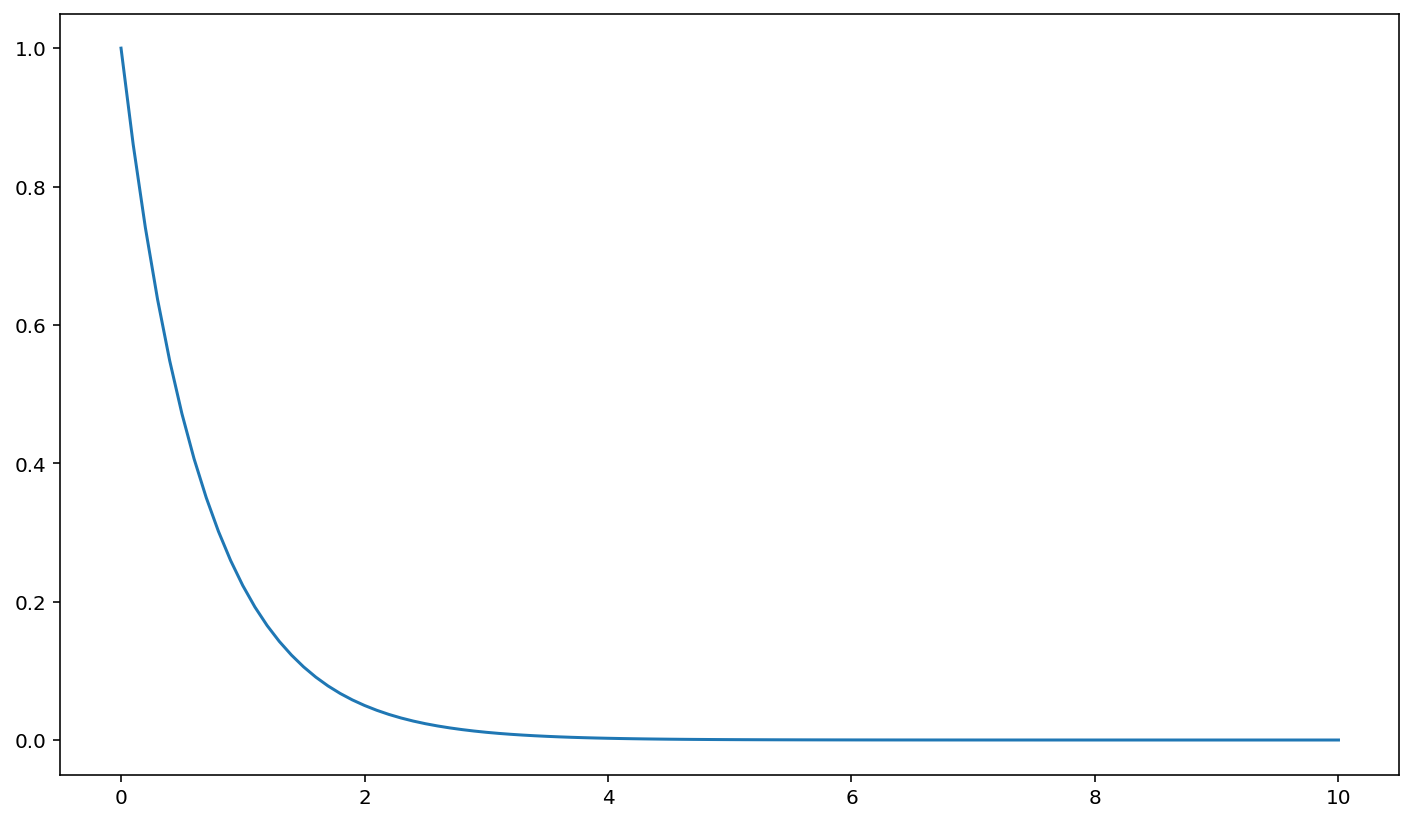

In [34]:
from scipy.integrate import solve_ivp
import numpy as np

def derivative_harmonic(t, x):
    dx = (-k*x)/m
    return dx

t_total = 10
t = 0
dt = 0.1

k = 1.5
x = 1
v = derivative_harmonic(t, x)

t_l = [t]
x_l = [x]

for i in range(0,int(t_total/dt)):
    t = t + dt
    x = x + v*dt
    v = derivative_harmonic(t,x)

    x_l.append(x)
    t_l.append(t)

sol = solve_ivp(derivative_harmonic, [0,10],x_l,t_eval=t_l)
xnum = np.array(sol.t)
plt.plot(sol.t.ravel(),sol.y[0])